In [2]:
import numpy as np
import scipy.misc
import psychopy.visual
import psychopy.event
import psychopy.filters
import matplotlib.pyplot as plt
import cv2

In [17]:
raw_img = cv2.imread('26 Nov @1708 0001.jpg')
real_img = raw_img
raw_img = cv2.cvtColor(raw_img, cv2.COLOR_BGR2GRAY)
real_img.T.shape

(3, 3840, 2160)

In [18]:
# conversion from color img to intensity modified img
def intensity_modify(orig_img, modified_intensity):
    orig_intensity = np.sum(orig_img, axis=0)
    orig_img = (orig_img.T * (modified_img.T / orig_intensity.T)).T
    # if orig_intensity == 0 then 0 else orig_img * (modified_img / orig_intensity)
    return orig_img

In [ ]:
# HE 
def HE(input_img): # input image has 3 channels 
    modified_img = input_img.T
    for i in range(3):
        img = modified_img[i]
        hist, bins = np.histogram(img.flatten(), 256,[0,256])
        cdf = hist.cumsum()
        cdf_m = np.ma.masked_equal(cdf,0)
        cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
        cdf = np.ma.filled(cdf_m,0).astype('uint8')
        modified_img[i] = cdf[img]
    return modified_img.T        

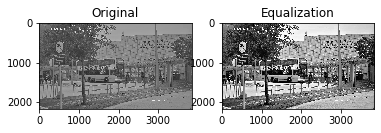

In [19]:
# Apply HE
plt.subplot(121),plt.imshow(real_img),plt.title('Original')
plt.subplot(122),plt.imshow(HE(real_img)),plt.title('Equalization')
plt.show()

In [24]:
# HE + HFE
# high-frequency emphasis
raw_img = (img2 / 255.0) * 2.0 - 1.0
raw_img = np.flipud(raw_img)
rms = 0.3

# make the mean to be zero
raw_img = raw_img - np.mean(raw_img)
# make the standard deviation to be 1
raw_img = raw_img / np.std(raw_img)
# make the standard deviation to be the desired RMS
raw_img = raw_img * rms

# convert to frequency domain
img_freq = np.fft.fft2(raw_img)

# calculate amplitude spectrum
img_amp = np.fft.fftshift(np.abs(img_freq))

hp_filt = psychopy.filters.butter2d_hp(
    size=raw_img.shape,
    cutoff=0.01,
    n=10
)

a = 0.3
b = 1
new_filt = a + b*hp_filt

img_filt = np.fft.fftshift(img_freq) * hp_filt

# convert back to an image
img_new2 = np.real(np.fft.ifft2(np.fft.ifftshift(img_filt)))

# convert to mean zero and specified RMS contrast
img_new2 = img_new2 - np.mean(img_new2)
img_new2 = img_new2 / np.std(img_new2)
img_new2 = img_new2 * rms

# there may be some stray values outside of the presentable range; convert < -1
# to -1 and > 1 to 1
img_new2 = np.clip(img_new2, a_min=-1.0, a_max=1.0)

In [21]:
raw_img = cv2.imread('xray2.jpg')
raw_img = cv2.cvtColor(raw_img, cv2.COLOR_BGR2GRAY)
# high-frequency emphasis
raw_img = (raw_img / 255.0) * 2.0 - 1.0
raw_img = np.flipud(raw_img)
rms = 0.3

# make the mean to be zero
raw_img = raw_img - np.mean(raw_img)
# make the standard deviation to be 1
raw_img = raw_img / np.std(raw_img)
# make the standard deviation to be the desired RMS
raw_img = raw_img * rms

# convert to frequency domain
img_freq = np.fft.fft2(raw_img)

# calculate amplitude spectrum
img_amp = np.fft.fftshift(np.abs(img_freq))

hp_filt = psychopy.filters.butter2d_hp(
    size=raw_img.shape,
    cutoff=0.01,
    n=10
)

a = 0.3
b = 1
new_filt = a + b*hp_filt

img_filt = np.fft.fftshift(img_freq) * hp_filt

# convert back to an image
img_new = np.real(np.fft.ifft2(np.fft.ifftshift(img_filt)))

# convert to mean zero and specified RMS contrast
img_new = img_new - np.mean(img_new)
img_new = img_new / np.std(img_new)
img_new = img_new * rms

# there may be some stray values outside of the presentable range; convert < -1
# to -1 and > 1 to 1
img_new = np.clip(img_new, a_min=-1.0, a_max=1.0)

In [22]:
#conversion to uint8
img_new = ((img_new+1)/2*256).astype('uint8')
img_new2 = ((img_new2+1)/2*256).astype('uint8')
plt.figure(dpi=1200)

<Figure size 7200x4800 with 0 Axes>

<Figure size 7200x4800 with 0 Axes>

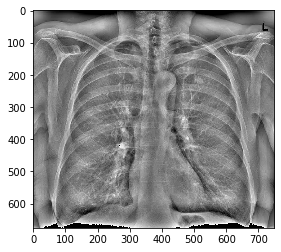

In [23]:
plt.imshow(np.flipud(img_new), cmap='gray', vmin=0, vmax=255)

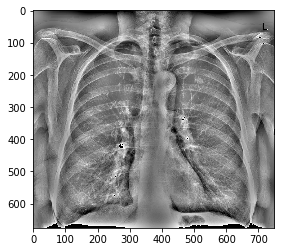

In [176]:
plt.imshow(np.flipud(img_new2), cmap='gray', vmin=0, vmax=255)

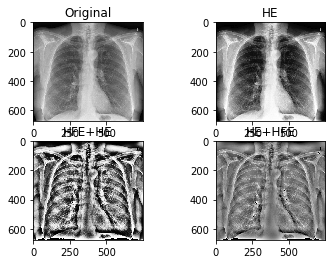

In [177]:
hist, bins = np.histogram(img_new.flatten(), 256,[0,256])
cdf = hist.cumsum()
cdf_m = np.ma.masked_equal(cdf,0)

#History Equalization 공식
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())

# Mask처리를 했던 부분을 다시 0으로 변환
cdf = np.ma.filled(cdf_m,0).astype('uint8')

img_new = cdf[img_new]
# # plt.imshow(np.flipud(img_new), cmap='gray', vmin=0, vmax=255)
plt.subplot(221),plt.imshow(np.flipud(raw_img), cmap='gray'),plt.title('Original')
plt.subplot(222),plt.imshow((img2), cmap='gray'),plt.title('HE')
plt.subplot(223),plt.imshow(np.flipud(img_new), cmap='gray'),plt.title('HFE+HE')
plt.subplot(224),plt.imshow(np.flipud(img_new2), cmap='gray'),plt.title('HE+HFE')

# plt.subplot(131),plt.imshow(np.flipud(raw_img)),plt.title('Original')
# plt.subplot(132),plt.imshow((img2)),plt.title('HE')
# plt.subplot(133),plt.imshow(np.flipud(img_new)),plt.title('HFE+HE')


plt.show()

(<matplotlib.image.AxesImage at 0x14e0552b908>, Text(0.5, 1.0, 'HFE+HE'))

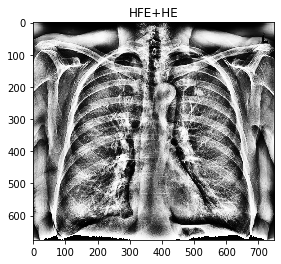

In [178]:
# plt.imshow(np.flipud(raw_img), cmap='gray'),plt.title('Original')
# plt.imshow((img2), cmap='gray'),plt.title('HE')
# plt.imshow(np.flipud(img_new)),plt.title('HFE+HE')
plt.imshow(np.flipud(img_new), cmap='gray'),plt.title('HFE+HE')

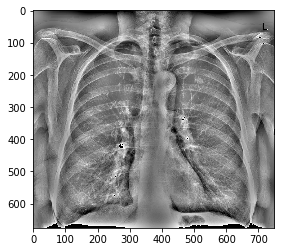

In [179]:
fig1 = plt.gcf()
plt.imshow(np.flipud(img_new), cmap='gray')
fig1.savefig('HFE.jpg', dpi=1200)
plt.imshow(np.flipud(img_new2), cmap='gray')
fig1.savefig('HFE2.jpg', dpi=1200)

(<matplotlib.axes._subplots.AxesSubplot at 0x14e05597d30>,
 Text(0.5, 1.0, 'HE+HFE'))

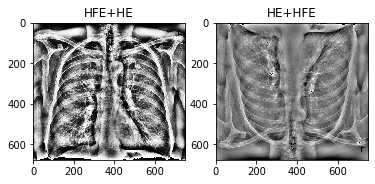

In [180]:
plt.subplot(121),plt.imshow(np.flipud(img_new), cmap='gray'),plt.title('HFE+HE')
plt.subplot(122),plt.imshow((img_new2), cmap='gray'),plt.title('HE+HFE')